In [1]:
# Importando bibliotecas necessárias
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.__version__ # verificando versão da biblioteca instalada

'0.12.2'

In [3]:
sns.get_dataset_names() # mostrar datasets disponíveis nativos da biblioteca

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('tips') # baixando dataset escolhido e atribuindo a um dataframe do pandas

In [5]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

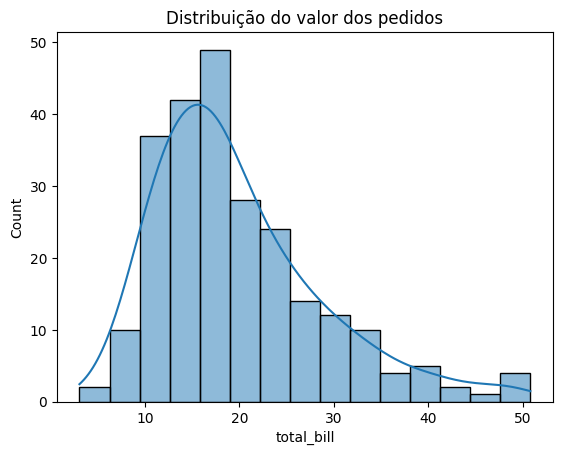

In [9]:
plt.title('Distribuição do valor dos pedidos')
sns.histplot(df,x='total_bill', bins=15, kde=True) # plot de histograma, bins diz o total de barras que teremos no histograma
#Kde mostra a função estimada a partir dos dados
plt.show()

[]

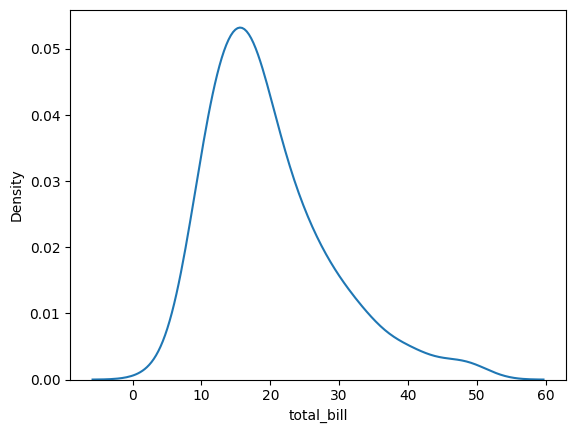

In [10]:
sns.kdeplot(df, x = 'total_bill') # Plotando somente curva aproximada dos dados
plt.plot()

In [11]:
df['size'].value_counts() # Quantas vezes se repetem cada número de pessoas por mesa

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

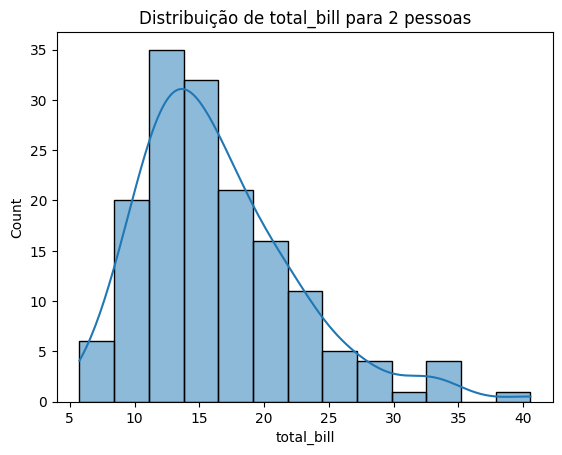

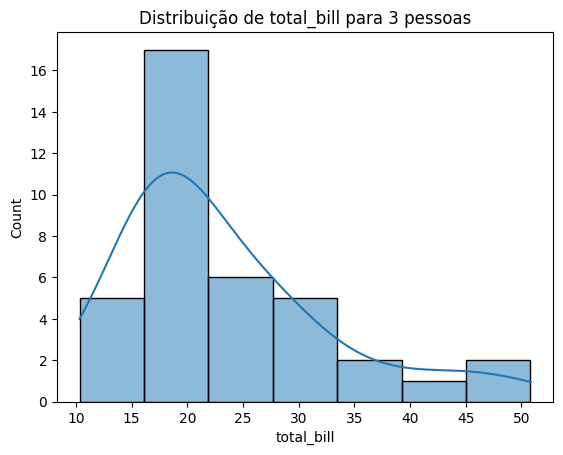

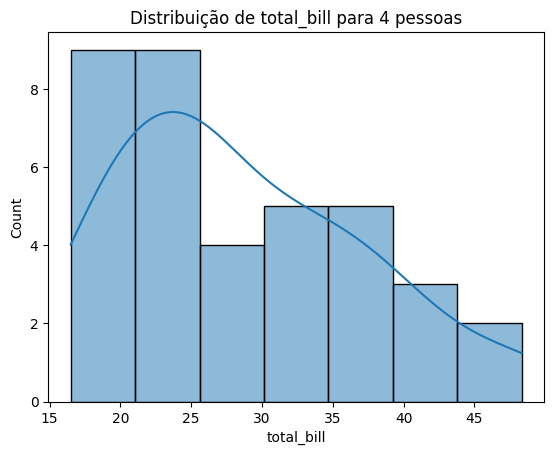

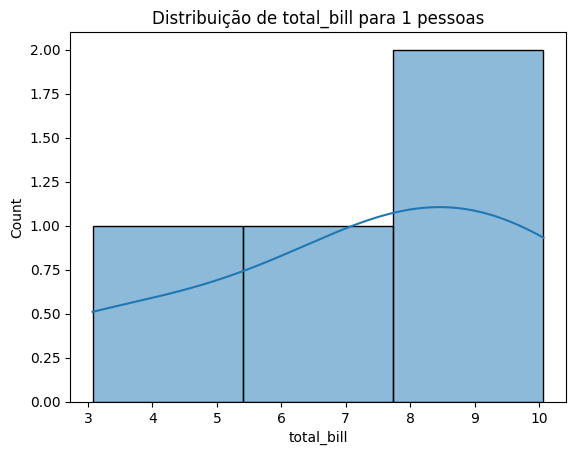

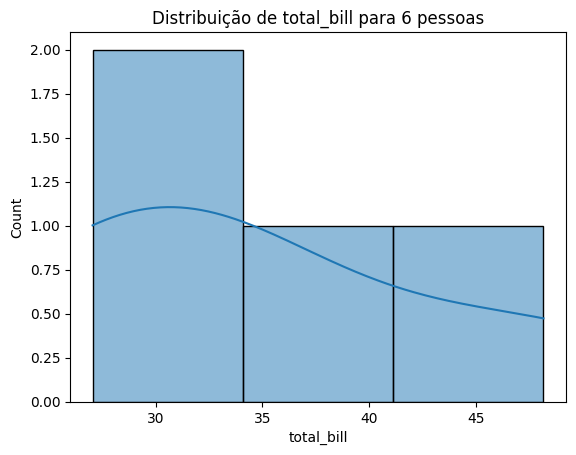

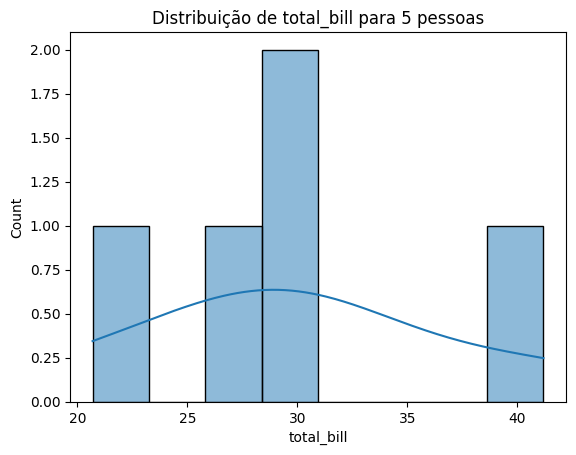

In [12]:
for tamanho in df['size'].unique():
    plt.title(f'Distribuição de total_bill para {tamanho} pessoas')
    sns.histplot(data=df.query(f'size == {tamanho}'), x='total_bill',kde=True)
    plt.show()

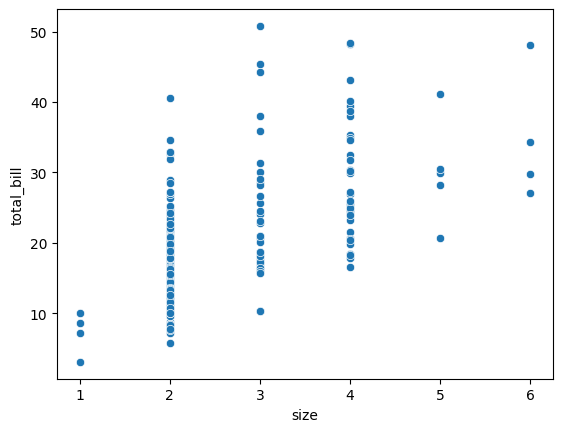

In [13]:
sns.scatterplot(df,x='size',y='total_bill')
plt.show()

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

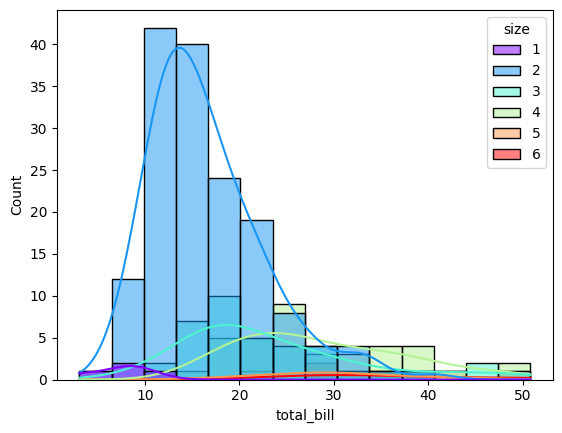

In [14]:
sns.histplot(df, x='total_bill', kde=True, hue='size', palette='rainbow') # hue é a matriz de tonalidade muda as cores de acordo com uma variável
# palette é a paleta de cores

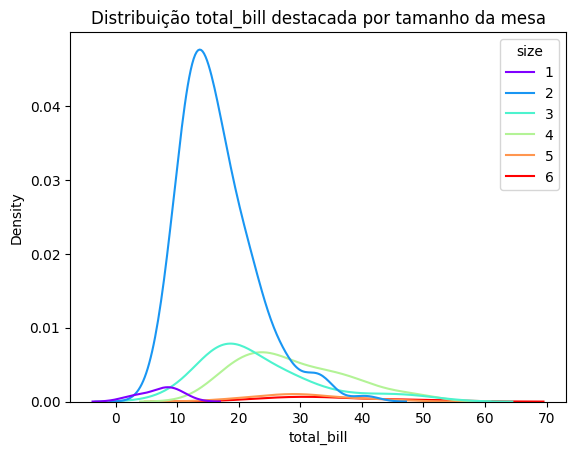

In [15]:
plt.title('Distribuição total_bill destacada por tamanho da mesa')
sns.kdeplot(df, x='total_bill', hue='size', palette='rainbow') # plotando somente as curvas
plt.savefig('Distribuição de faturamento total por mesa.png')

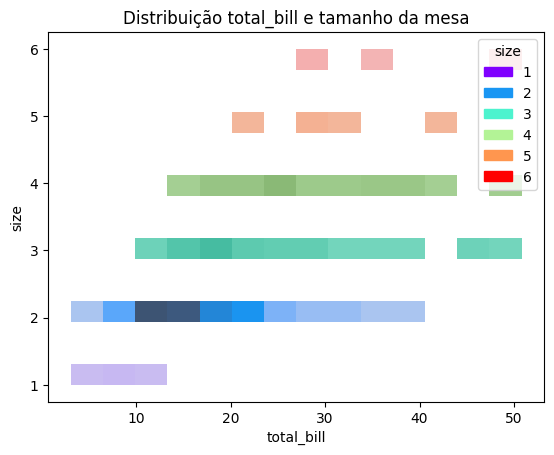

In [16]:
plt.title('Distribuição total_bill e tamanho da mesa')
sns.histplot(df,x='total_bill',y='size', hue='size',palette='rainbow')
plt.show()

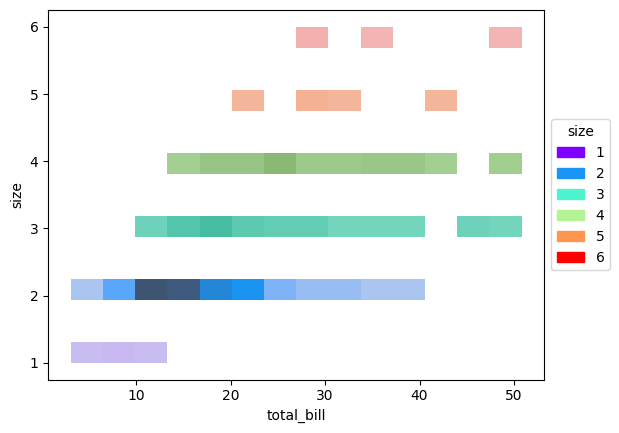

In [17]:
# Como colocar a legenda para fora do gráfico em seaborn
ax = sns.histplot(df,x='total_bill',y='size', hue='size',palette='rainbow')
ax.legend(handles=ax.legend_.legendHandles,              # pega atributos correspondentes da legenda
          labels=[i.get_text()for i in ax.legend_.texts], # pega o textos da legenda 
          title = ax.legend_.get_title().get_text(),        # pega o título da legenda
          bbox_to_anchor =(1,0.5),loc='center left')           # desloca os elementos pegos para o local que queremos

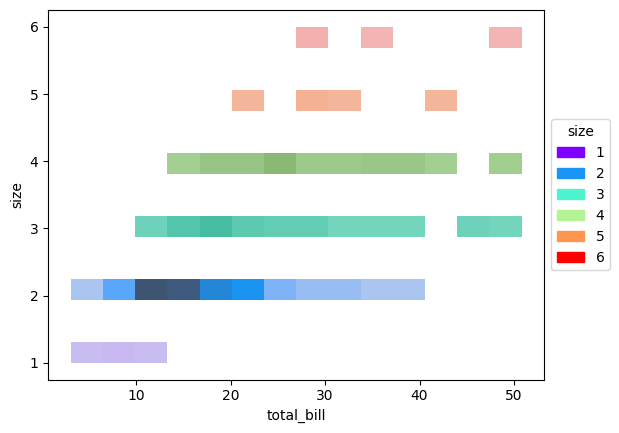

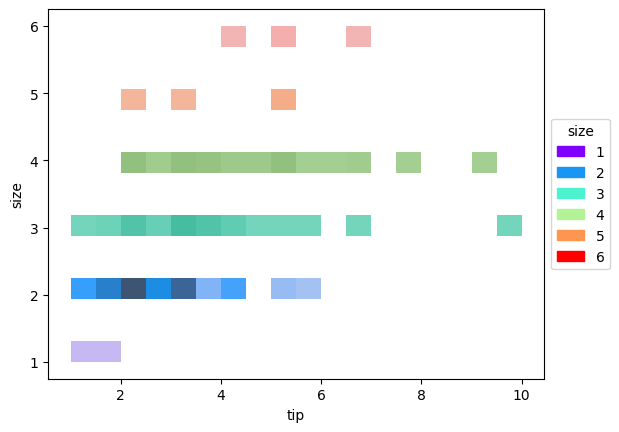

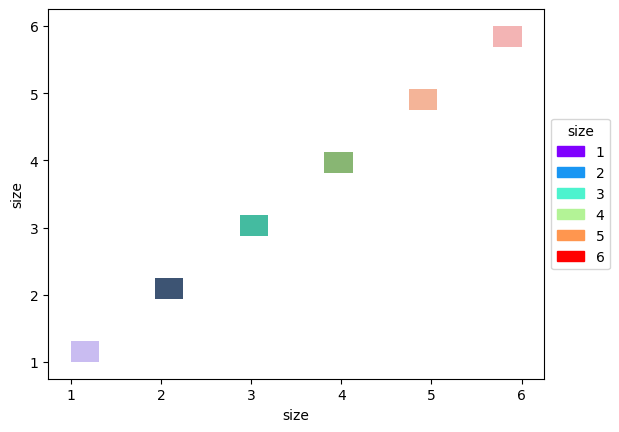

In [18]:
# vendo relação do tamanho da mesa com demais variáveis numéricas
for col in df.select_dtypes(include=np.number):
    ax = sns.histplot(df,x=col ,y='size', hue='size',palette='rainbow')
    ax.legend(handles=ax.legend_.legendHandles,              
            labels=[i.get_text()for i in ax.legend_.texts], 
            title = ax.legend_.get_title().get_text(),       
            bbox_to_anchor =(1,0.5),loc='center left') 
    plt.show()

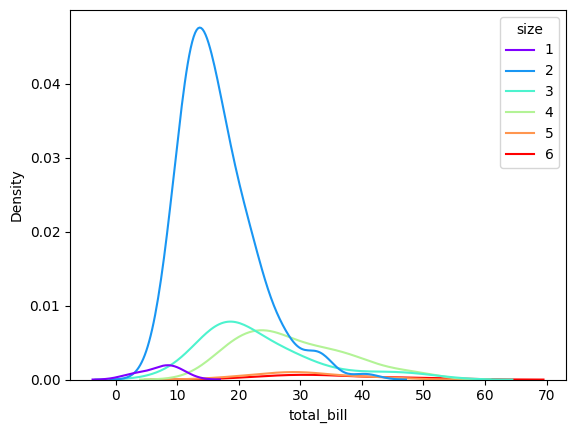

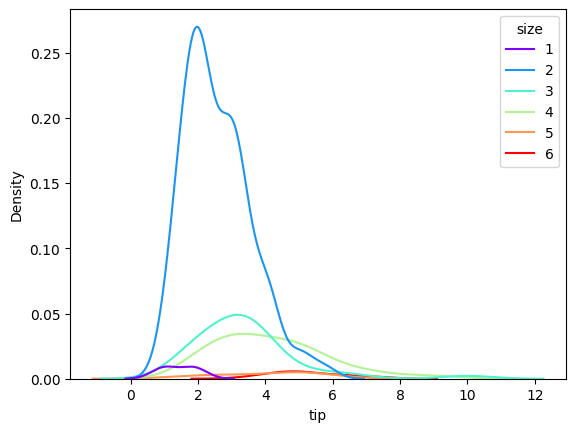

C:\Users\leoju\AppData\Local\Temp\ipykernel_4056\1328072553.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df,x=col, hue='size',palette='rainbow')


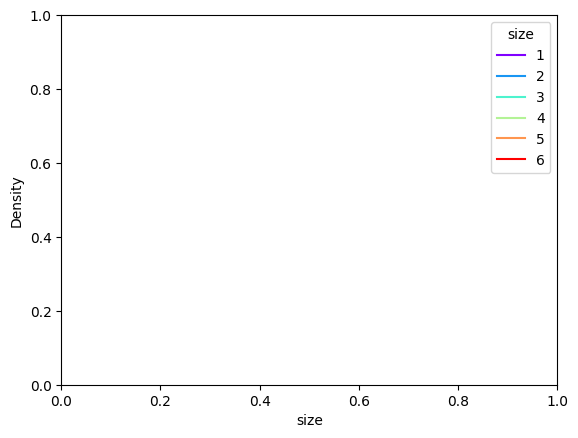

In [19]:
# vendo relação do tamanho da mesa com demais variáveis numéricas
for col in df.select_dtypes(include=np.number):
    sns.kdeplot(df,x=col, hue='size',palette='rainbow')
    plt.show()

In [20]:
# Mostra a relação entre total bill e tip, mostra a distribuição de cada um e a relação de cada um deles(dispersão + histogramas )


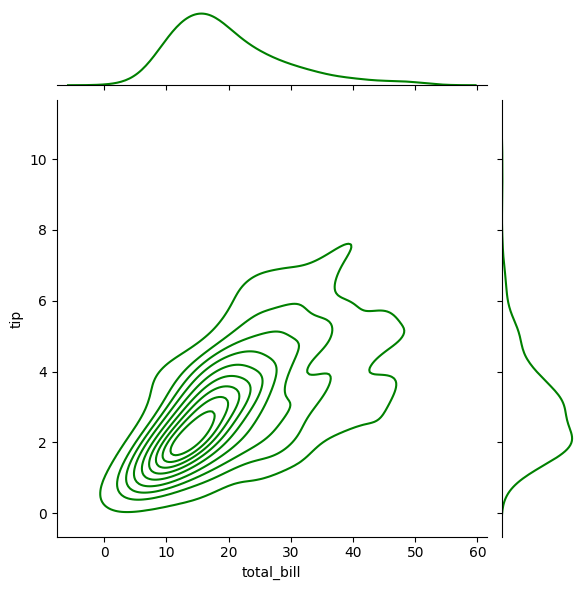

In [21]:
sns.jointplot(df,x='total_bill',y='tip', kind='kde', color='green') # kind é opicional e muda os tipos de gráficos 

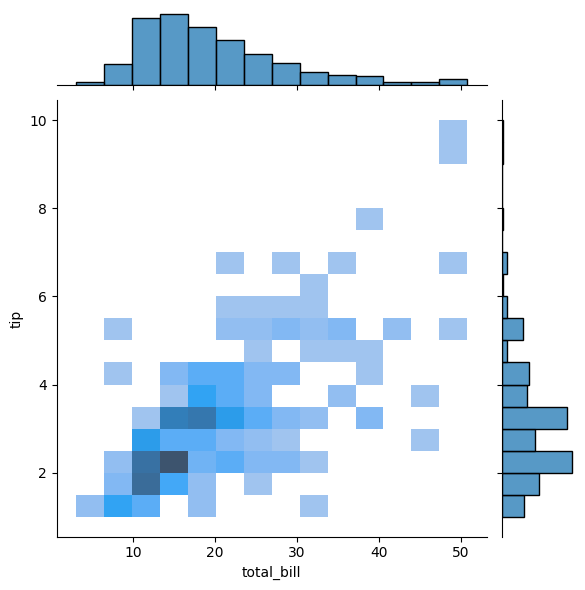

In [22]:
sns.jointplot(df,x='total_bill',y='tip', kind='hist')

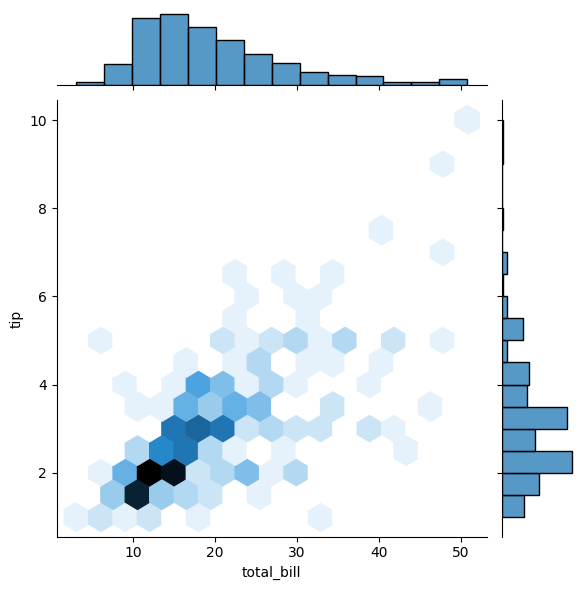

In [23]:
sns.jointplot(df,x='total_bill',y='tip', kind='hex')

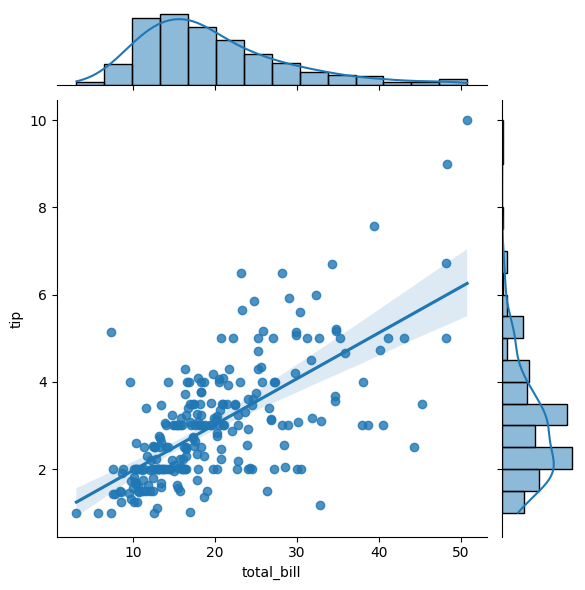

In [24]:
sns.jointplot(df,x='total_bill',y='tip', kind='reg')

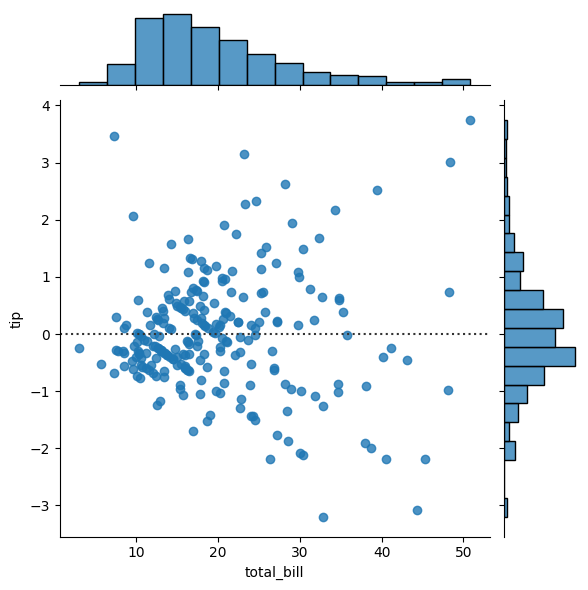

In [25]:
sns.jointplot(df,x='total_bill',y='tip', kind='resid')

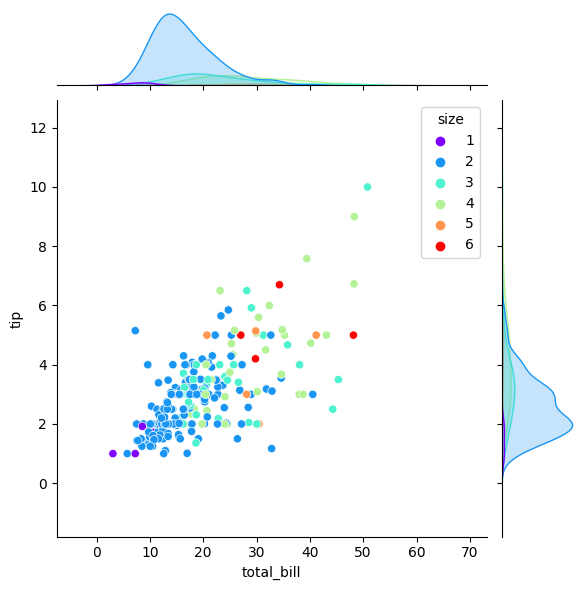

In [58]:
# Análise com relação a total_bill,tip e size correlacionados
sns.jointplot(df,x='total_bill',y='tip',hue='size',palette='rainbow');
plt.savefig('Distribuição de Gojeta Versus Faturamento Destacado por Tamanho da Mesa.png')


In [27]:
# verificando contagem dos valores nas colunas categóricas
for col in df.select_dtypes(exclude=np.number):
    print(df[col].value_counts())
    print()

sex
Male      157
Female     87
Name: count, dtype: int64

smoker
No     151
Yes     93
Name: count, dtype: int64

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time
Dinner    176
Lunch      68
Name: count, dtype: int64



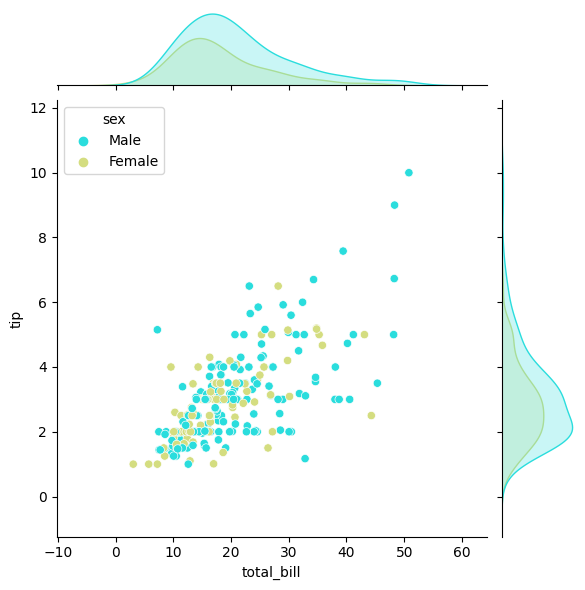

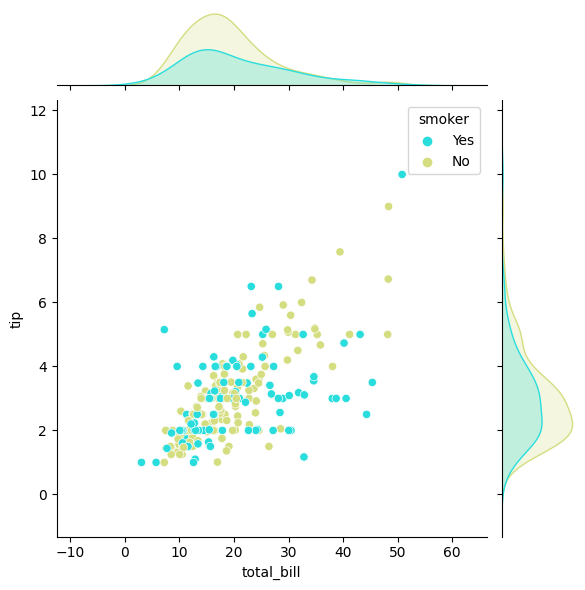

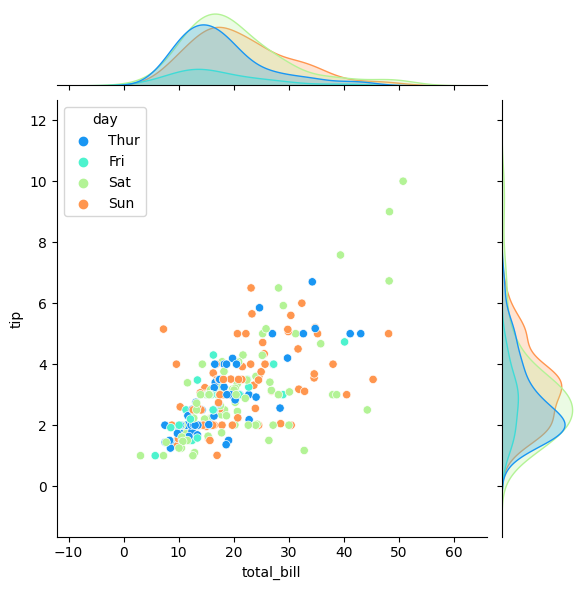

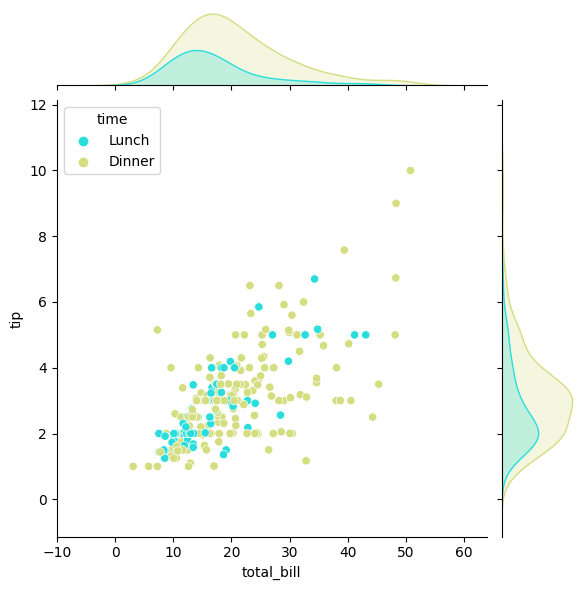

In [28]:
# Usando valores categóricos como legenda de cor
for col in df.select_dtypes(exclude=np.number):
    sns.jointplot(df,x='total_bill',y='tip',hue=col ,palette='rainbow')

In [29]:
# Separando dias da semana de final de semana
df['type_day'] = df['day'].apply(lambda x : 'weekday' if x in ['Thur','Fri'] else 'weekend') 
df['type_day']

0      weekend
1      weekend
2      weekend
3      weekend
4      weekend
        ...   
239    weekend
240    weekend
241    weekend
242    weekend
243    weekday
Name: type_day, Length: 244, dtype: object

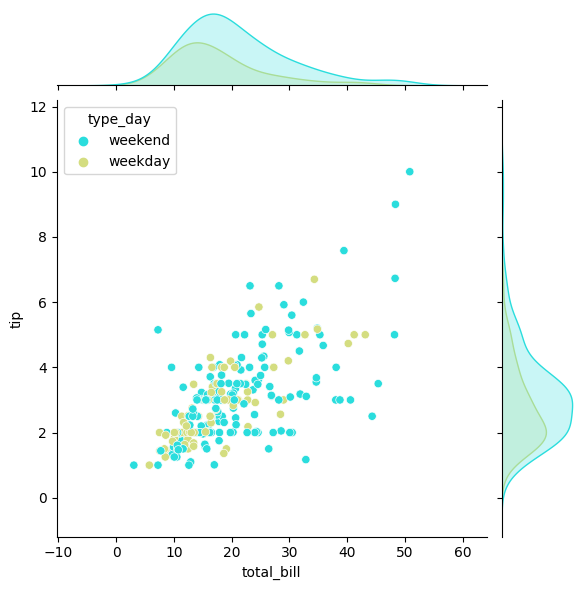

In [30]:
# Melhorando visualização de dias da semana
sns.jointplot(df,x='total_bill',y='tip',hue='type_day', palette='rainbow');

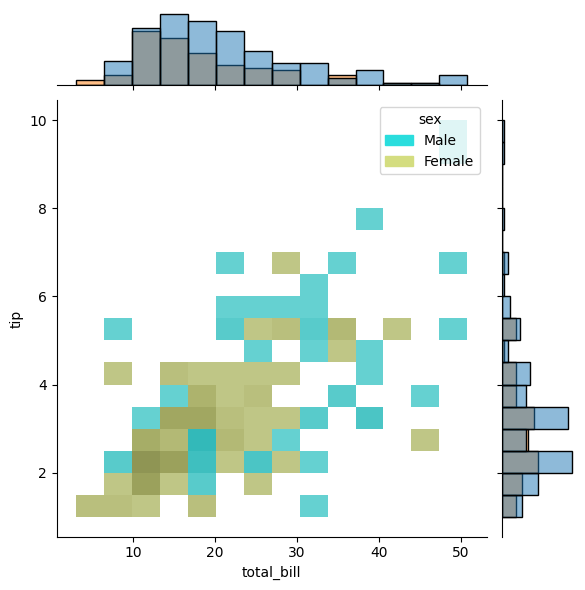

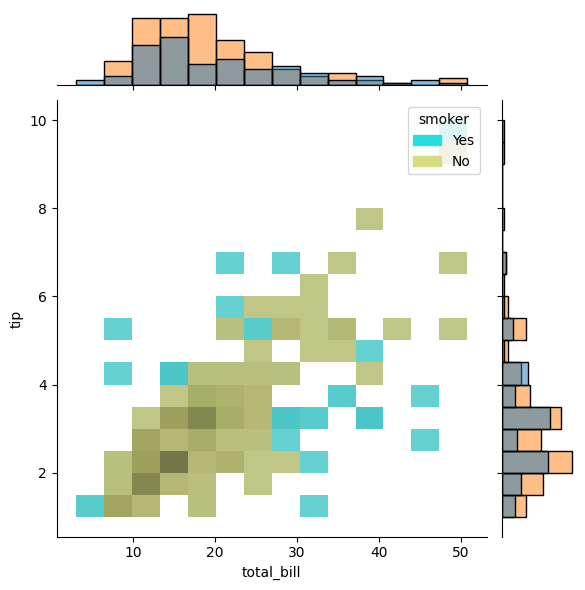

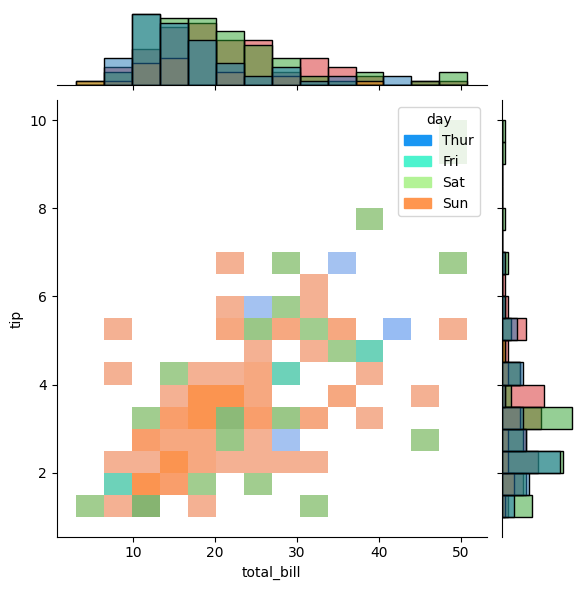

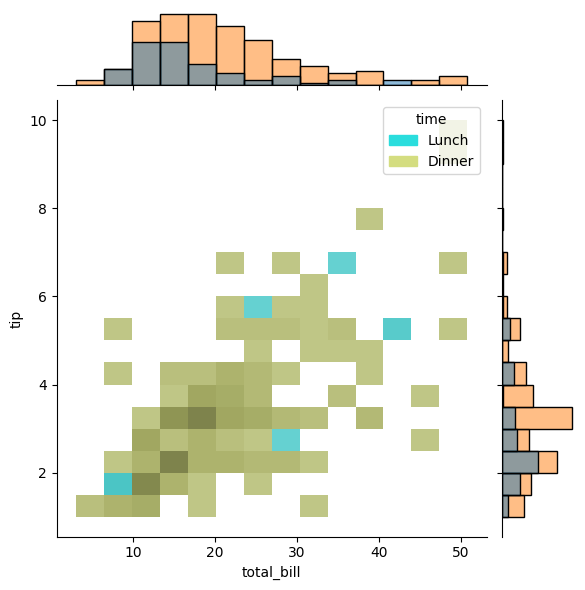

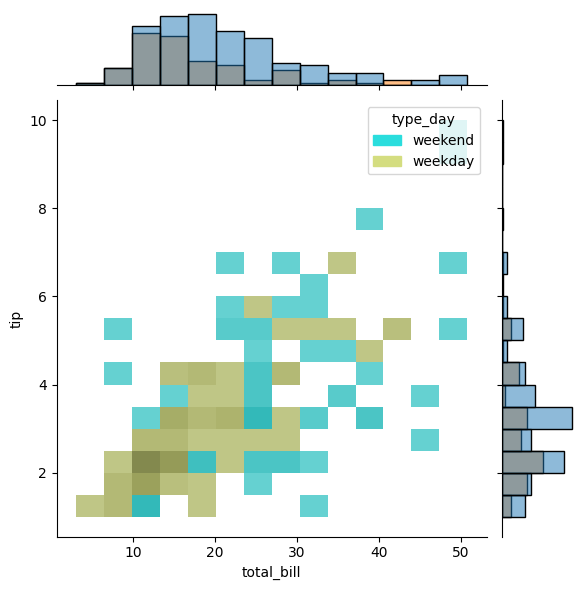

In [31]:
for col in df.select_dtypes(exclude=np.number):
    sns.jointplot(df,x='total_bill',y='tip',hue=col ,palette='rainbow', kind='hist')

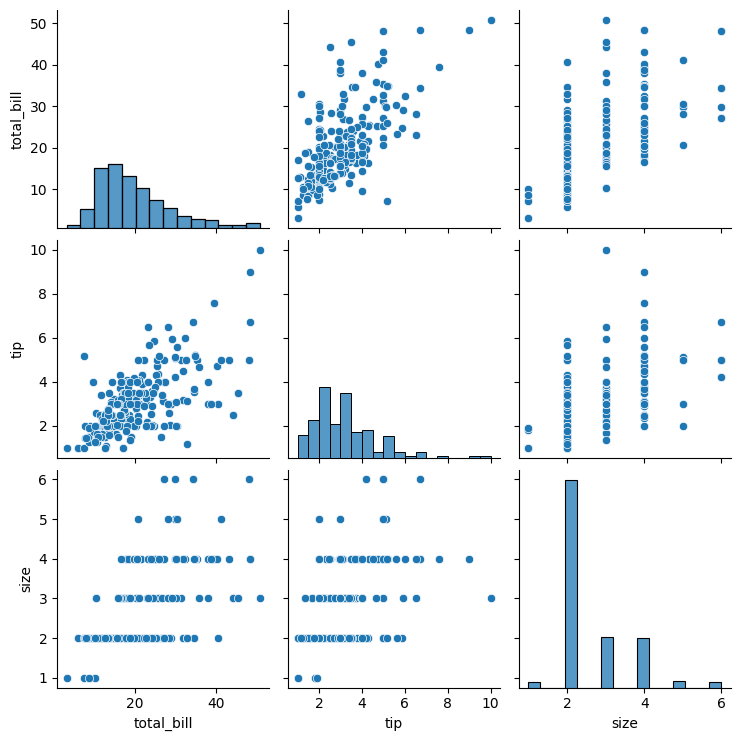

In [32]:
sns.pairplot(df); # gera uma matriz com gráficos numericos do dataframe
# Na diagonal principal temos a distribuição de cada variável e fora da diagonal temos os pairplots (dispersão)

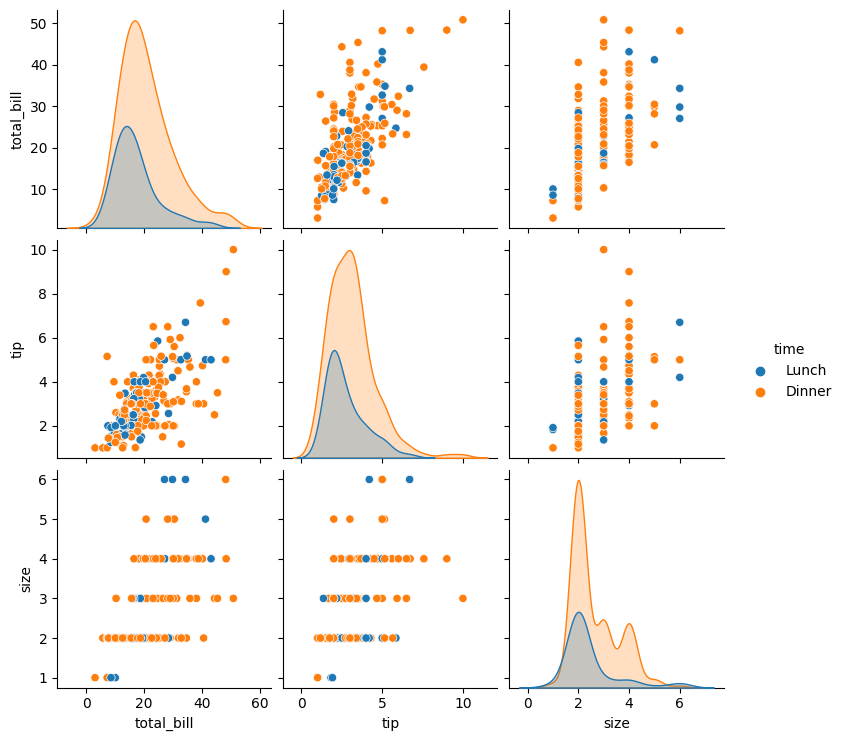

In [60]:
sns.pairplot(df,hue='time')
plt.savefig('Pairplot dos valores numéricos, com destaque de Janta x Almoço.png')

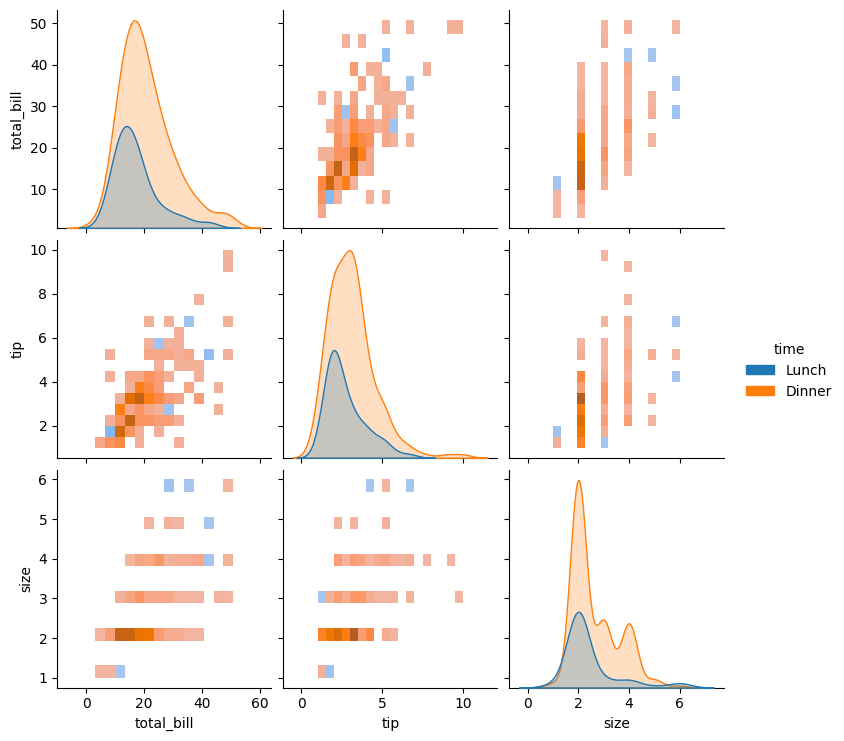

In [34]:
sns.pairplot(df,hue='time',kind='hist',diag_kind='kde'); # Podemos mudar os tipos de gráfico tanto na diagonal como fora dela
# kind pode assumir scatter,reg,kde,hist
# diag_kind pode assumir auto,hist, kde, none 


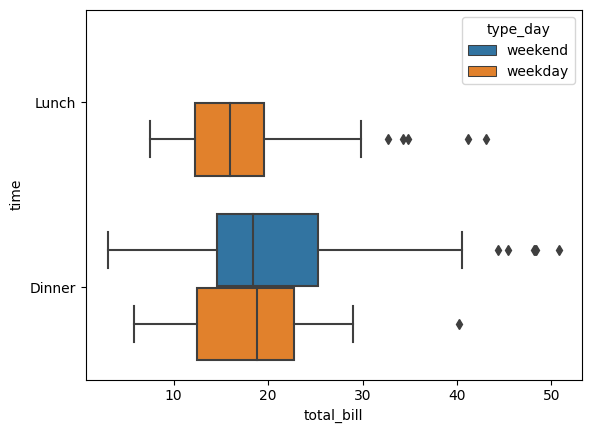

In [35]:
# Boxplot mostra os quartis e distribuição dos dados
sns.boxplot(df, x='total_bill',y='time',hue='type_day')

plt.show()

In [36]:
df.groupby(['type_day','time'])[['total_bill']].median() # pegando valores da mediana em dataframe para comparar com gráfico

total_bill
type_day time              
weekday  Lunch       15.965
         Dinner      18.780
weekend  Lunch          NaN
         Dinner      18.350

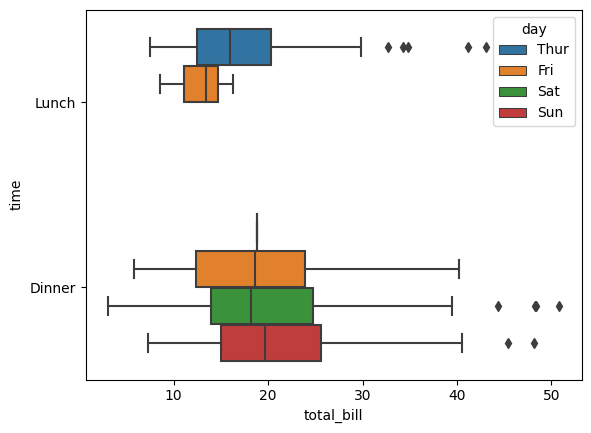

In [61]:
sns.boxplot(df, x='total_bill',y='time',hue='day')
plt.savefig('Boxplot - faturamento por dia da semana.png')

In [38]:
df.groupby(['time','day'])[['total_bill']].agg(['count','median'])

total_bill        
                 count  median
time   day                    
Lunch  Thur         61  16.000
       Fri           7  13.420
       Sat           0     NaN
       Sun           0     NaN
Dinner Thur          1  18.780
       Fri          12  18.665
       Sat          87  18.240
       Sun          76  19.630

<AxesSubplot: xlabel='total_bill', ylabel='time'>

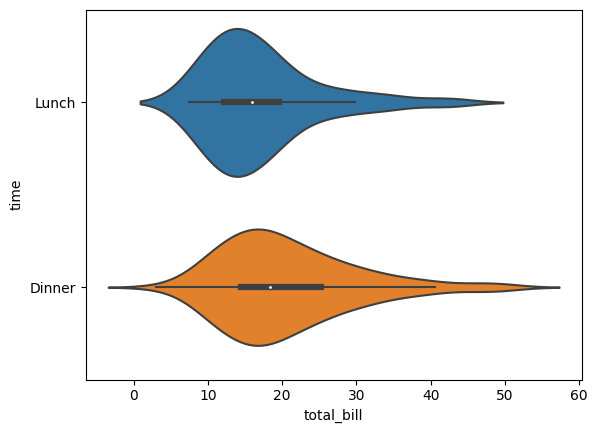

In [39]:
# Gráfico de violino, Kde junto com boxplot no meio
sns.violinplot(df,x='total_bill',y='time')

<AxesSubplot: xlabel='total_bill', ylabel='day'>

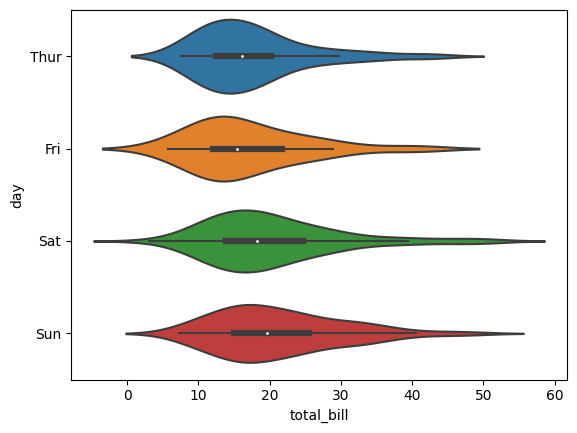

In [40]:
sns.violinplot(df,x='total_bill',y='day')

<AxesSubplot: xlabel='total_bill', ylabel='day'>

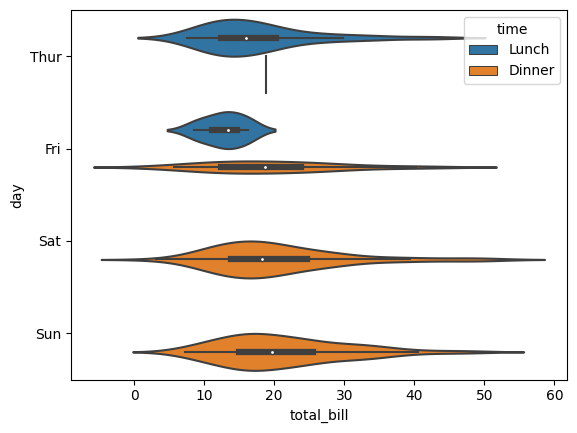

In [41]:
sns.violinplot(df,x='total_bill',y='day', hue='time')

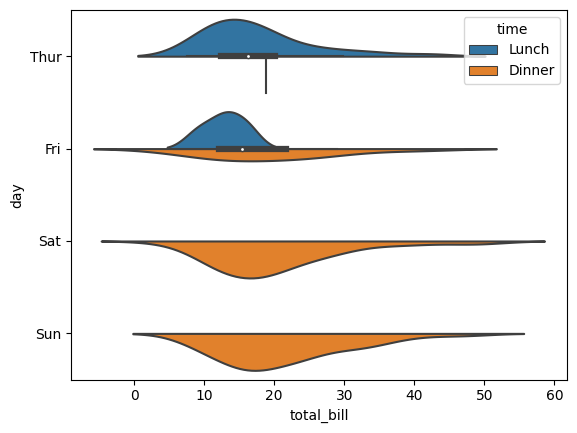

In [62]:
sns.violinplot(df,x='total_bill',y='day', hue='time', split=True) # colocando o gráfico para aparecer uma variável em cima e outra embaixo
# Permitindo split do gráfico acima. ver imagens para melhor compreensão
plt.savefig('Plot de violino do faturamento versus dia da semana para almoço e janta.png')

In [43]:
for col in df.select_dtypes(exclude=np.number):
    print(df[col].value_counts())
    print()

sex
Male      157
Female     87
Name: count, dtype: int64

smoker
No     151
Yes     93
Name: count, dtype: int64

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time
Dinner    176
Lunch      68
Name: count, dtype: int64

type_day
weekend    163
weekday     81
Name: count, dtype: int64



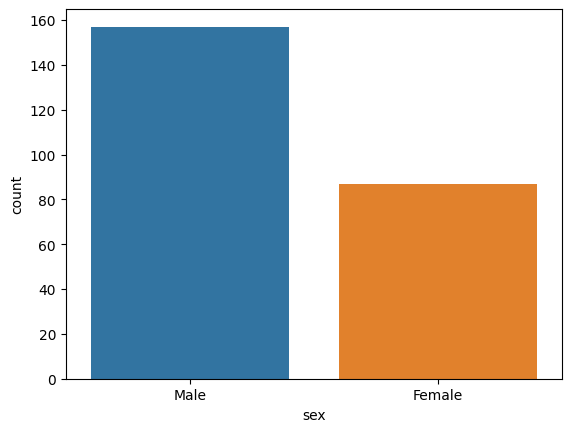

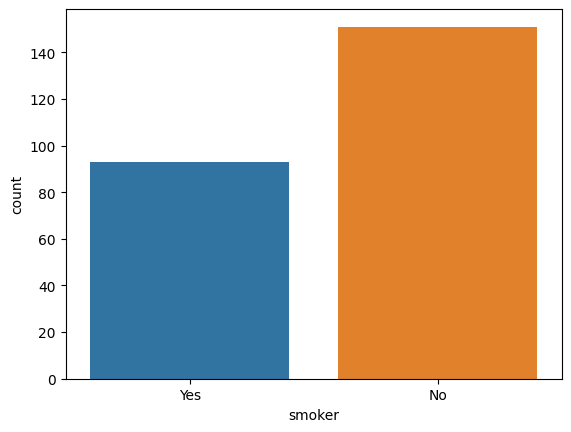

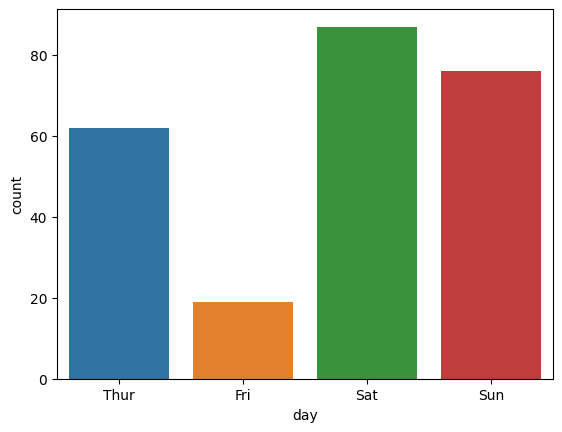

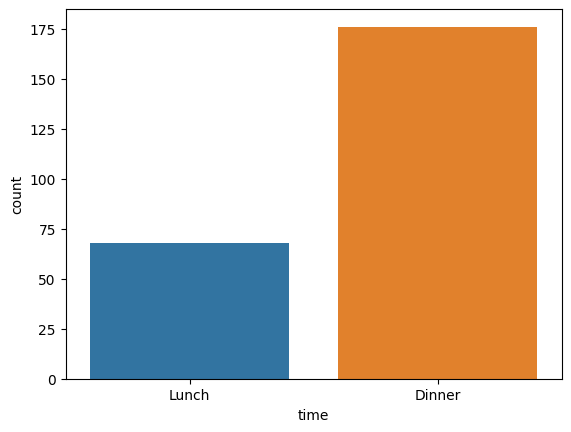

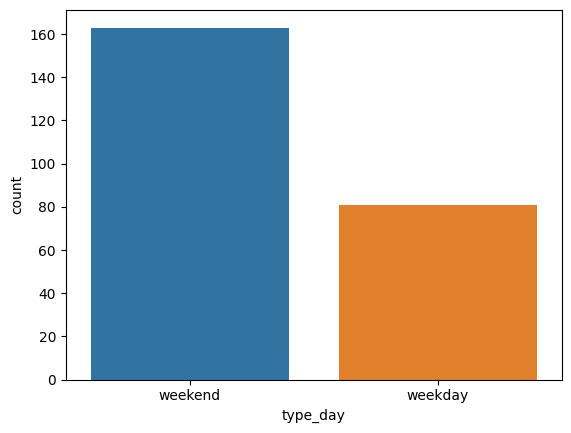

In [44]:
# countplot conta variáveis categóricas e plota em barras. fazendo isso para todas as colunas catgóricas:
for col in df.select_dtypes(exclude=np.number):
    sns.countplot(df, x= col)
    plt.show()

In [45]:
df.groupby(['type_day'])[['total_bill']].mean()

,total_bill
type_day,
weekday,17.558148
weekend,20.893006


<AxesSubplot: xlabel='type_day', ylabel='total_bill'>

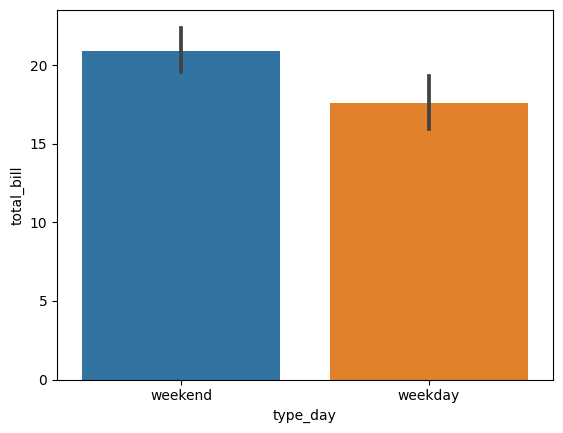

In [46]:
# Gráfico de barras das médias com intervalo de confiança
sns.barplot(df, x='type_day',y='total_bill')

<AxesSubplot: xlabel='type_day', ylabel='total_bill'>

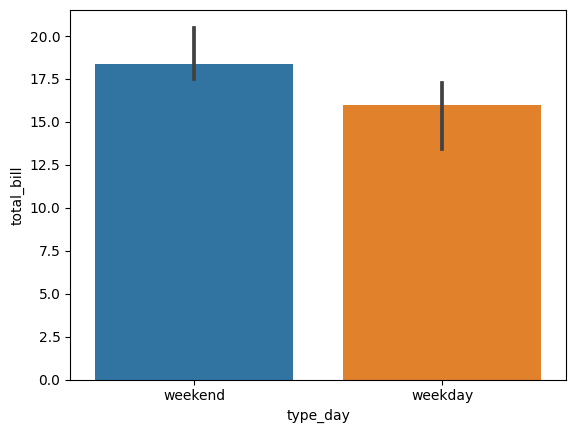

In [47]:
# média é a função agregadora padrão, mas podemos usar outras com o argumento estimator
sns.barplot(df, x='type_day',y='total_bill', estimator=np.median) # plotando com mediana

In [48]:
df.select_dtypes(include=np.number).corr() # .corr() mostra correlação entre as variáveis

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot: >

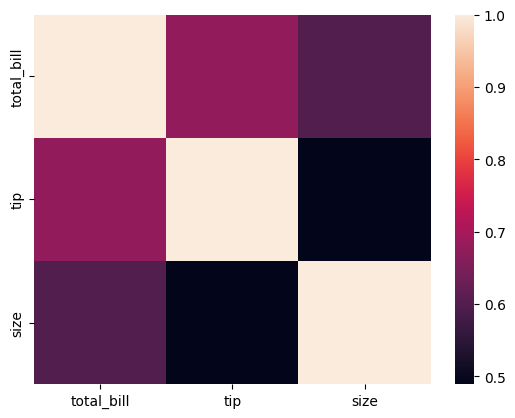

In [49]:
# criando heatmap a partir das correlações
sns.heatmap(df.select_dtypes(include=np.number).corr())

<AxesSubplot: >

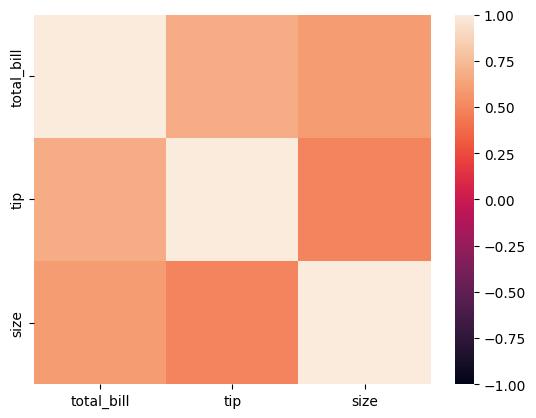

In [50]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), vmin=-1,vmax=1) # definindo intervalo

<AxesSubplot: >

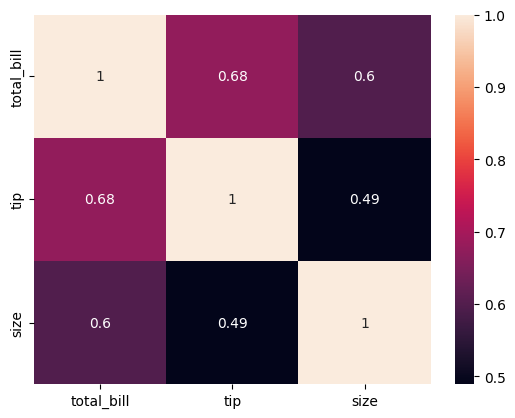

In [51]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True) # definindo para mostrar valores juntamente com cores

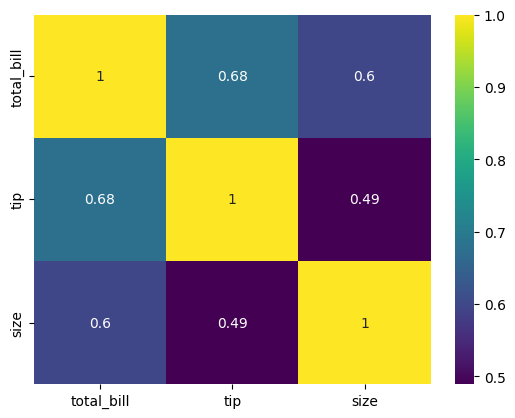

In [64]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='viridis',annot=True) # alguns tipos de gráfico o pallete é trocado por cmap, olhar documentação
plt.savefig('Heatmap de Correlação dos Tipos Numéricos.png')
